## 三、数据转换
* 以上是数据的重排，还有就是过滤、清理以及转换

### 1 移除重复数据

In [60]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,'k2': [1, 1, 2, 3, 3, 4, 4]})

print data
print data.duplicated() # 返回一个布尔型Series，表示各行是否是重复行
print data.drop_duplicates() # 返回移除了重复行的DataFrame

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4


In [62]:
data['v1'] = range(7)

print data
print data.drop_duplicates(['k1']) # 根据k1列过滤重复项
print data.drop_duplicates(['k1', 'k2'], keep='last') # 默认保留第一个出现的值，而keep='last'则保留最后一个

    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6
    k1  k2  v1
0  one   1   0
3  two   3   3
    k1  k2  v1
1  one   1   1
2  one   2   2
4  two   3   4
6  two   4   6


### 2 利用函数或映射进行数据转换

In [64]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
 'corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

print data

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0


In [66]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # 使大小写一致

print meat_to_animal,
print data

{'pastrami': 'cow', 'bacon': 'pig', 'pulled pork': 'pig', 'corned beef': 'cow', 'nova lox': 'salmon', 'honey ham': 'pig'}           food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [67]:
data['food'].map(lambda x: meat_to_animal[x.lower()]) # map 可实现元素及转换以及其他数据清理工作
print data

          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


### 3 替换值

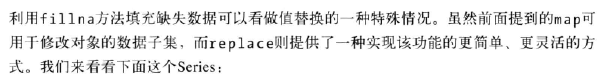

In [68]:
Image(filename="picture\Replacing Values.png")

In [69]:
data = Series([1., -999., 2., -999., -1000., 3.])

print data

print data.replace(-999, np.nan) # 将表示缺失值的-999，替换成pandas可识别的NA值
print data.replace([-999, -1000], np.nan) # 一次替换多个值
print data.replace([-999, -1000], [np.nan, 0]) # 不同的值不同的替换
print data.replace({-999: np.nan, -1000: 0}) # 参数为字典

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64
0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64
0     1
1   NaN
2     2
3   NaN
4   NaN
5     3
dtype: float64
0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64
0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64


### 4 重命名轴索引

In [80]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])

print data
print
print data.index.map(str.upper) # 轴标签map方法

data.index = data.index.map(str.upper) # 赋值给index，从而修改DataFrame
print data

data.rename(index=str.title, columns=str.upper) # 创建数据集的转换版（而不是修改原始数据）
print data

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

['OHIO' 'COLORADO' 'NEW YORK']
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [85]:
data.rename(index={'OHIO': 'INDIANA'},columns={'three': 'peekaboo'}) # 部分轴标签的更新
print data

_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True) # 修改某个数据集
print data

          one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11
          one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


### 5 离散化和面元划分

In [94]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)

print cats
print cats.codes # 为年龄数据进行标号
print cats.categories # 分类名称  
print pd.value_counts(cats) # 方括号表示闭端（包括），圆括号表示开端

print pd.cut(ages, [18, 26, 36, 61, 100], right=False) # 开闭段可通过right=False修改

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
[0 0 0 1 0 0 2 1 3 2 2 1]
Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64
[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]


In [92]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior'] 
print pd.cut(ages, bins, labels=group_names) # 设置分类名称

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]


In [95]:
data = np.random.rand(20)

print data
print pd.cut(data, 4, precision=2) # 传入数量，则会根据数据的最大值和最小值计算等长划分

[ 0.49310815  0.1331151   0.49398694  0.98552286  0.63745101  0.18213464
  0.38735829  0.79714897  0.03395903  0.92748342  0.28816111  0.95941326
  0.99310002  0.11728799  0.91049949  0.44507195  0.09913783  0.22878695
  0.61604196  0.16277338]
[(0.27, 0.51], (0.033, 0.27], (0.27, 0.51], (0.75, 0.99], (0.51, 0.75], ..., (0.27, 0.51], (0.033, 0.27], (0.033, 0.27], (0.51, 0.75], (0.033, 0.27]]
Length: 20
Categories (4, object): [(0.033, 0.27] < (0.27, 0.51] < (0.51, 0.75] < (0.75, 0.99]]


In [98]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # 根据样本分位数进行划分

# print data
print cats
print pd.value_counts(cats)
print pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]) # 自定义分位数

[(0.755, 3.338], (0.755, 3.338], (-0.599, 0.0743], (-0.599, 0.0743], [-3.0163, -0.599], ..., (0.0743, 0.755], (-0.599, 0.0743], (0.755, 3.338], (-0.599, 0.0743], (-0.599, 0.0743]]
Length: 1000
Categories (4, object): [[-3.0163, -0.599] < (-0.599, 0.0743] < (0.0743, 0.755] < (0.755, 3.338]]
(0.755, 3.338]       250
(0.0743, 0.755]      250
(-0.599, 0.0743]     250
[-3.0163, -0.599]    250
dtype: int64
[(1.338, 3.338], (0.0743, 1.338], (-1.319, 0.0743], (-1.319, 0.0743], [-3.0163, -1.319], ..., (0.0743, 1.338], (-1.319, 0.0743], (0.0743, 1.338], (-1.319, 0.0743], (-1.319, 0.0743]]
Length: 1000
Categories (4, object): [[-3.0163, -1.319] < (-1.319, 0.0743] < (0.0743, 1.338] < (1.338, 3.338]]


### 6 检测和过滤异常值

In [103]:
np.random.seed(12345)

data = DataFrame(np.random.randn(1000, 4))
print data.describe()

                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067684     0.067924     0.025598    -0.002298
std       0.998035     0.992106     1.006835     0.996794
min      -3.428254    -3.548824    -3.184377    -3.745356
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.366626     2.653656     3.260383     3.927528


In [104]:
col = data[3]
print col[np.abs(col) > 3] # 绝对值大于3

print data[(np.abs(data) > 3).any(1)] # 选出全部含有“超过3或-3的值”的行

data[np.abs(data) > 3] = np.sign(data) * 3 # 限制在区间-3 到3
print data.describe()

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64
            0         1         2         3
5   -0.539741  0.476985  3.248944 -1.021228
97  -0.774363  0.552936  0.106061  3.927528
102 -0.655054 -0.565230  3.176873  0.959533
305 -2.315555  0.457246 -0.025907 -3.399312
324  0.050188  1.951312  3.260383  0.963301
400  0.146326  0.508391 -0.196713 -3.745356
499 -0.293333 -0.242459 -3.056990  1.918403
523 -3.428254 -0.296336 -0.439938 -0.867165
586  0.275144  1.179227 -3.184377  1.369891
808 -0.362528 -3.548824  1.553205 -2.186301
900  3.366626 -2.372214  0.851010  1.332846
                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067623     0.068473     0.025153    -0.002081
std       0.995485     0.990253     1.003977     0.989736
min      -3.000000    -3.000000    -3.000000    -3.000000
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.0

### 7 排列和随机采样

In [106]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))
sampler = np.random.permutation(5) # 随机重排序

print sampler
print df
print df.take(sampler) # 用替换方式选取随机子集

print df.take(np.random.permutation(len(df))[:3])

[0 3 4 2 1]
    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
    0   1   2   3
0   0   1   2   3
3  12  13  14  15
4  16  17  18  19
2   8   9  10  11
1   4   5   6   7
    0   1   2   3
3  12  13  14  15
4  16  17  18  19
2   8   9  10  11


In [107]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10) # 随机整数
draws = bag.take(sampler)

print bag
print sampler
print draws

[ 5  7 -1  6  4]
[3 2 1 2 0 4 4 4 3 4]
[ 6 -1  7 -1  5  4  4  4  6  4]


### 8 计算指标/哑变量

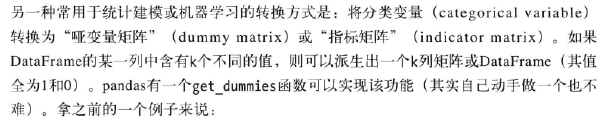

In [108]:
Image(filename="picture\Computing Indicator or Dummy Variables.png")

In [112]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})

print df
print pd.get_dummies(df['key'])

dummies = pd.get_dummies(df['key'], prefix='key') # 列名加前缀
df_with_dummy = df[['data1']].join(dummies)

print dummies
print df_with_dummy

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b
   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0
   key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0
   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch07/movies.dat', sep='::', header=None,names=mnames)
movies[:10]

In [ ]:
genre_iter = (set(x.split('|')) for x in movies.genres)

genres = sorted(set.union(*genre_iter))
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1
    
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

In [115]:
values = np.random.rand(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

print values
print bins
print pd.get_dummies(pd.cut(values, bins))

[ 0.44740483  0.32410284  0.92360521  0.51923163  0.53105727  0.17332397
  0.34263784  0.1083731   0.9276808   0.18307257]
[0, 0.2, 0.4, 0.6, 0.8, 1]
   (0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1]
0         0           0           1           0         0
1         0           1           0           0         0
2         0           0           0           0         1
3         0           0           1           0         0
4         0           0           1           0         0
5         1           0           0           0         0
6         0           1           0           0         0
7         1           0           0           0         0
8         0           0           0           0         1
9         1           0           0           0         0
